**Instituto Tecnológico de Costa Rica**

**Escuela de Ingeniería en Computación**

**Maestría Académica en Ciencias de la Computación**

**Curso: Electiva Deep Learning**

**Segundo Semestre 2024**

**Profesor: Dr. Luis-Alexander Calvo-Valverde**

---

**Trabajo Práctico:** 1

**Datos de la entrega:** Jueves 26 de setiembre 2024, a más tardar a las 6:00 pm

**Medio de entrega**: Por medio del TEC-Digital.

**Entregables**: Un archivo jupyter ( .IPYNB ) y todos los archivos adiconales que se requieran para correr su Cuaderno (En un archivo comprimido). En caso de requerir mucho espacio, solicitarle al profesor una carpeta en One-Drive para subir la solución.

---

**Estudiantes:**
- Andrey Arguedas Espinoza - 2020426569


# Trabajo Practico 1 - Andrey Arguedas Espinoza - 2020426569

## 0. Imports


In [1]:
#Montar instancia de Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

## Carga de los datos

In [3]:
#Carga de datos del csv
df = pd.read_csv('C:/Users/Andrey/Desktop/DeepLearning/Documentos de Deep Learning GR 40/TP1/ham10000_metadata_2024-09-01.csv')


In [4]:
#Construimos el dataset con imagenes + lables
images = []
lables = []
n = 0
max_images = 1000
for filename in os.listdir('C:/Users/Andrey/Desktop/DeepLearning/Documentos de Deep Learning GR 40/TP1/ISIC/'):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Open the image
        img_path = os.path.join('C:/Users/Andrey/Desktop/DeepLearning/Documentos de Deep Learning GR 40/TP1/ISIC/', filename)
        img = Image.open(img_path)
        # Convert the image to a NumPy array
        img_array = np.array(img)

        # Add the array to the list of images
        images.append(img_array)
        #Adds the lable value for that image
        lables.append(df.loc[df['isic_id'] == filename.replace(".jpg", ""), 'melanocytic'].values[0])
        n += 1
        if n % 100 == 0:
            print(n)
        

        if n == max_images:
          break

# Convert the list of images into a single NumPy array
images_array = np.array(images)

# Check the shape of the resulting NumPy array
print(images_array.shape)
#print(images_array[0])

100
200
300
400
500
600
700
800
900
1000
(1000, 450, 600, 3)


In [5]:
dataset_images_trainX = images_array
dataset_images_trainY = np.array(lables)

print(dataset_images_trainX.shape)
print(dataset_images_trainY.shape)

print(type(dataset_images_trainX))
print(type(dataset_images_trainY))

# prompt: select the first item of the list and print it

#print(dataset_images_trainX[0])

(1000, 450, 600, 3)
(1000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## Visualize some images to see they are loading correctly


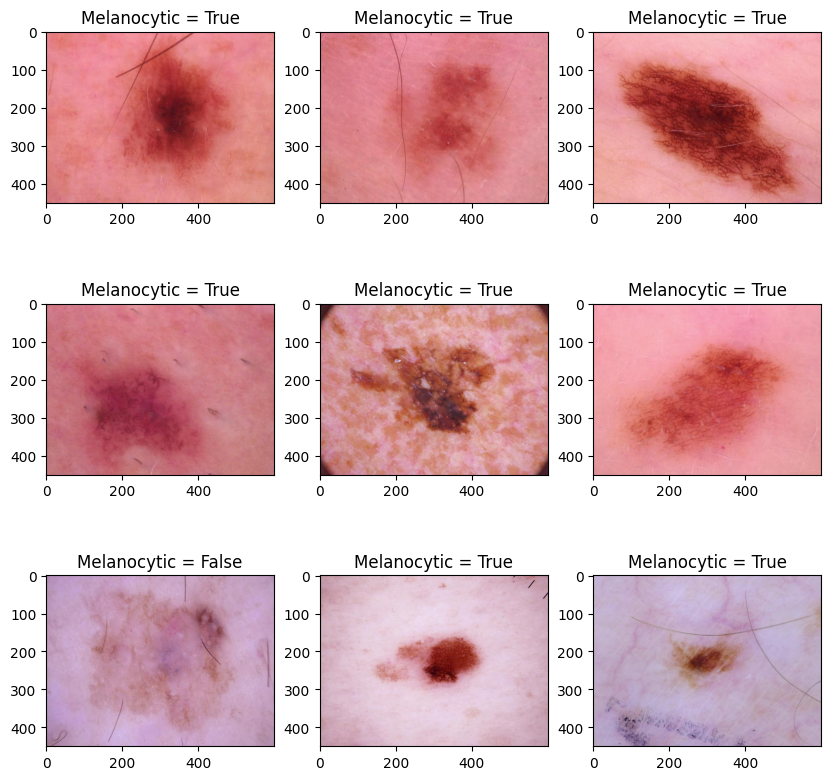

In [6]:
plt.figure(figsize=(10, 10))

for index, digit in zip(range(0, 9), dataset_images_trainX[:10]):
    plt.subplot(3, 3, index + 1)
    plt.imshow(digit)
    #plt.imshow(np.reshape(digit, (28,28)), cmap=plt.cm.gray)
    if lables[index] == 1:
      plt.title("Melanocytic = True")
    else:
      plt.title("Melanocytic = False")
plt.show()

## Mostrar informacion basica de los datos cargados desde el CSV

In [7]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11720 entries, 0 to 11719
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   isic_id                 11720 non-null  object 
 1   attribution             11720 non-null  object 
 2   copyright_license       11720 non-null  object 
 3   age_approx              11337 non-null  float64
 4   anatom_site_general     9503 non-null   object 
 5   benign_malignant        9042 non-null   object 
 6   concomitant_biopsy      11720 non-null  bool   
 7   diagnosis               11720 non-null  object 
 8   diagnosis_confirm_type  11720 non-null  object 
 9   image_type              11719 non-null  object 
 10  lesion_id               11720 non-null  object 
 11  melanocytic             11720 non-null  bool   
 12  sex                     11377 non-null  object 
dtypes: bool(2), float64(1), object(10)
memory usage: 1.0+ MB


,age_approx
count,11337.000000
mean,52.037135
std,16.704833
min,5.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


In [8]:
#Observar cuantos datos corresponden a positivo o falso para melanocytic
print("******************************\n")
print("Melanocytic: values distribution")
print(df['melanocytic'].value_counts())

print("******************************\n")

print("Cross Table - Melanocytic x Sex:")

melanocytic_sex = pd.crosstab(index=df["melanocytic"], columns=df["sex"])
print(melanocytic_sex)

******************************

Melanocytic: values distribution
melanocytic
True     9042
False    2678
Name: count, dtype: int64
******************************

Cross Table - Melanocytic x Sex:
sex          female  male
melanocytic              
False          1012  1502
True           4186  4677


## Preparacion de los datos


## Division del conjunto de entrenamiento para obtener una parte de test y validacion

In [9]:
from sklearn.model_selection import train_test_split

# Step 1: Split into train (60%) and remaining (40%)
X_train, X_remaining, y_train, y_remaining = train_test_split(dataset_images_trainX, dataset_images_trainY, train_size=0.6, random_state=42)


# Step 2: Split remaining data into validation (20%) and test (20%)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

print(X_train.shape)
print(y_train.shape)

print(type(X_train))
print(type(y_train))

print(X_val.shape)
print(y_val.shape)

print(type(X_val))
print(type(y_val))

print(X_test.shape)
print(y_test.shape)

print(type(X_test))
print(type(y_test))

(600, 450, 600, 3)
(600,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(200, 450, 600, 3)
(200,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(200, 450, 600, 3)
(200,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## 2. Definicion de la arquitectura de la Red Neuronal Artificial

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [11]:
network = models.Sequential()

network.add(layers.Dense(50, activation='relu', input_shape=(450*600*3,)))
network.add(layers.Dense(10, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

### 2.2. Acceso a los elementos definidos de la RNA

In [12]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                40500050  
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 40,500,571
Trainable params: 40,500,571
Non-trainable params: 0
_________________________________________________________________


In [13]:
network.layers

In [14]:
hidden1 = network.layers[1]
weights, biases = hidden1.get_weights()
print(weights.shape)
print(biases.shape)

(50, 10)
(10,)


## 3. Configuracion de la Red Neuronal Artificial

Para que la Red Neuronal Artificial funcione adecuadamente va a requerir tres componentes adicionales que se seleccionan durante el proceso de compilación:
1. **La función de error**: Se utiliza en el proceso de optimización de los parámetros del modelo para medir el error  producido al modificar el valor de los parámetros del modelo en una dirección determinada
2. **La función de optimización**: Se corresponde con la función encargada de actualizar el valor de los parámetros del modelo en una dirección determinada en función del resultado de la función de error
3. **Metricas para monitorizar el proceso de entrenamiento**: Es interesante utilizar un conjunto de métricas durante el proceso de entrenamiento de la Red Neuronal Artificial de manera que podamos saber en cada iteración si el valor de los parámetros del modelo es adecuado o se están produciendo problemas como *overfitting*

In [15]:
network.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy', 'Precision'])

## Data Normalization and Rescaling


In [16]:
d1, d2, d3, d4 = X_train.shape

X_train_prep = X_train.reshape((d1, d2*d3*d4))
X_train_prep = X_train_prep.astype('float32') / 255

d1, d2, d3, d4 = X_test.shape

X_test_prep = X_test.reshape((d1, d2*d3*d4))
X_test_prep = X_test_prep.astype('float32') / 255

d1, d2, d3, d4 = X_val.shape

X_val_prep = X_val.reshape((d1, d2*d3*d4))
X_val_prep = X_val_prep.astype('float32') / 255

X_train_prep[0]


array([0.70980394, 0.6117647 , 0.7372549 , ..., 0.627451  , 0.5294118 ,
       0.6156863 ], dtype=float32)

## 5. Entrenamiento de la Red Neuronal Artificial

In [17]:
history = network.fit(X_train_prep,
                      y_train,
                      epochs=10,
                      validation_data=(X_val_prep, y_val))

Epoch 1/10
19/19 [==============================] - 7s 277ms/step - loss: 41.7287 - accuracy: 0.7300 - precision: 0.8276 - val_loss: 11.3168 - val_accuracy: 0.7900 - val_precision: 0.7897
Epoch 2/10
19/19 [==============================] - 5s 275ms/step - loss: 8.2787 - accuracy: 0.7733 - precision: 0.8481 - val_loss: 4.6946 - val_accuracy: 0.7750 - val_precision: 0.9741
Epoch 3/10
19/19 [==============================] - 5s 265ms/step - loss: 17.3947 - accuracy: 0.7150 - precision: 0.8186 - val_loss: 3.7997 - val_accuracy: 0.8150 - val_precision: 0.8138
Epoch 4/10
19/19 [==============================] - 5s 263ms/step - loss: 18.5891 - accuracy: 0.6683 - precision: 0.8000 - val_loss: 5.2845 - val_accuracy: 0.8250 - val_precision: 0.8333
Epoch 5/10
19/19 [==============================] - 5s 282ms/step - loss: 8.8040 - accuracy: 0.7933 - precision: 0.8577 - val_loss: 3.3097 - val_accuracy: 0.8300 - val_precision: 0.9481
Epoch 6/10
19/19 [==============================] - 5s 274ms/step 

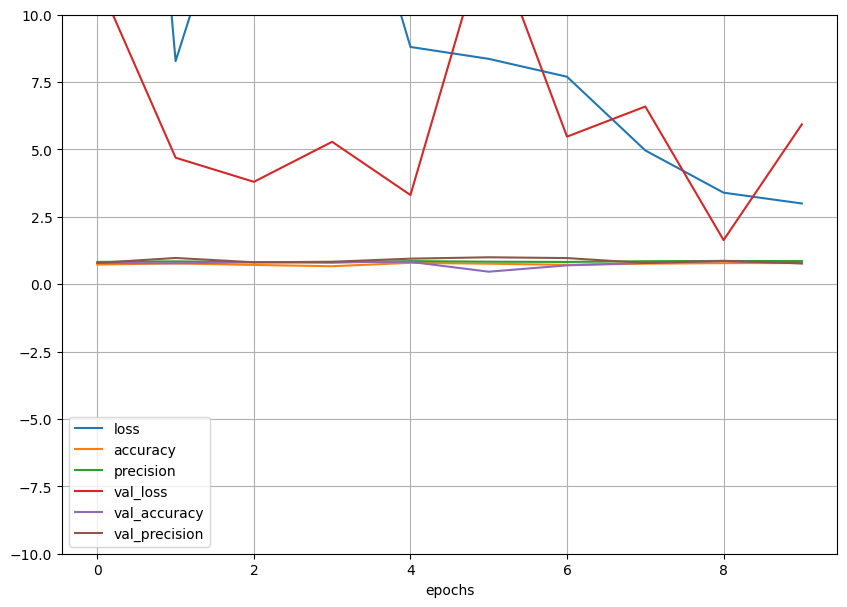

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(-10, 10)
plt.xlabel("epochs")
plt.show()

## 6. Validación con el conjunto de datos de pruebas

In [19]:
test_loss, test_acc, test_prec = network.evaluate(X_test_prep, y_test)
print('test_acc:', test_acc)
print('test_prec:', test_prec)

7/7 [==============================] - 0s 38ms/step - loss: 6.0497 - accuracy: 0.7800 - precision: 0.7789
test_acc: 0.7799999713897705
test_prec: 0.7788944840431213


## 7. Predicción de nuevos ejemplos

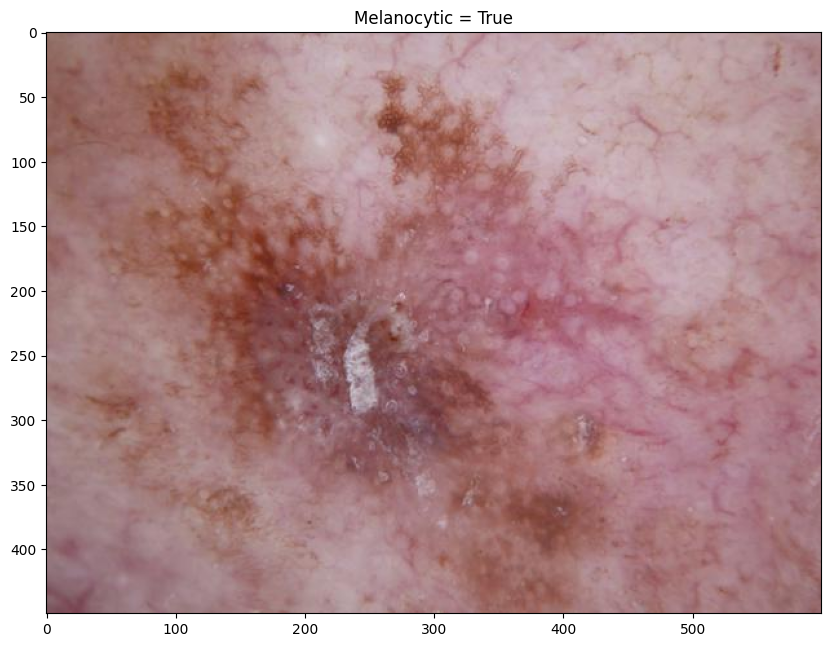

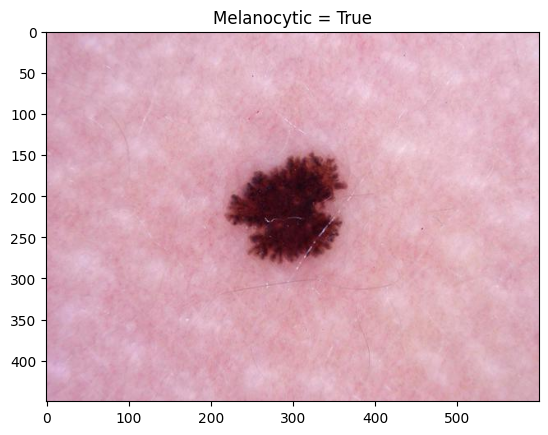

In [20]:
# Suponemos que X_new es un nuevo ejemplo que el algoritmo no ha visto nunca
new_index = 0
X_new = X_test[new_index]

plt.figure(figsize=(10, 10))

plt.imshow(X_new)
if lables[new_index] == 1:
  plt.title("Melanocytic = True")
else:
  plt.title("Melanocytic = False")

plt.show()

# Suponemos que X_new es un nuevo ejemplo que el algoritmo no ha visto nunca
new_index2 = 4
X_new2 = X_test[new_index2]

plt.imshow(X_new2)
if lables[new_index2] == 1:
  plt.title("Melanocytic = True")
else:
  plt.title("Melanocytic = False")

plt.show()



In [21]:
# Preprocesamos la nueva imagen que queremos predecir
print(X_new.shape)
d1, d2, d3 = X_new.shape

X_new_prep = X_new.reshape((1, d1*d2*d3))
X_new_prep = X_new_prep.astype('float32') / 255

# Realizamos la predicción
y_pred = network.predict(X_new_prep)
print("Predicted: ", y_pred)


# Realizamos la prediccion obteniendo una clase en lugar de una probabilidad
np.argmax(network.predict(X_new_prep), axis=-1)


# Preprocesamos la nueva imagen que queremos predecir
print(X_new2.shape)
d1, d2, d3 = X_new2.shape

X_new_prep2 = X_new2.reshape((1, d1*d2*d3))
X_new_prep2 = X_new_prep2.astype('float32') / 255

# Realizamos la predicción
y_pred2 = network.predict(X_new_prep2)
print("Predicted: ", y_pred2)


# Realizamos la prediccion obteniendo una clase en lugar de una probabilidad
np.argmax(network.predict(X_new_prep2), axis=-1)

(450, 600, 3)
1/1 [==============================] - 0s 184ms/step
Predicted:  [[1.]]
1/1 [==============================] - 0s 39ms/step
(450, 600, 3)
1/1 [==============================] - 0s 33ms/step
Predicted:  [[1.]]
1/1 [==============================] - 0s 62ms/step


array([0], dtype=int64)

## 8. Guardar el modelo en disco

De la forma que se indica a continuación, vamos a exportar en un fichero los siguientes componentes de la red neuronal:
* La arquitectura del modelo
* Los parámetros del modelo
* Los hiperparámetros del modelo
* Las métricas

In [22]:
# Guardamos el modelo en disco
#network.save("model_melanocytic.h5")